Exercice 1 : Le jeu de la vie


In [4]:
import warnings
warnings.filterwarnings("ignore")

4) Application de la fonnction "calcul_nb_voisins(Z)" à la liste Z :

In [48]:
from utils.py import calcul_nb_voisins  ## importation da la fonction calcul_nb_voisins à partir du fichier utils.py
Z=[[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

calcul_nb_voisins(Z)


[[0, 0, 0, 0, 0, 0],
 [0, 1, 3, 1, 2, 0],
 [0, 1, 5, 3, 3, 0],
 [0, 2, 3, 2, 2, 0],
 [0, 1, 2, 2, 1, 0],
 [0, 0, 0, 0, 0, 0]]

- Explication de la sortie obtenue avec "N=calcul_nb_voisins(Z)" :

Ce code calcule le nombre de voisin de chaque cellule de Z. La sortie N représente pas la matrice contenant le nombre de voisin de chaque cellule de Z.

- docstring de la fonction "itération_jeu" :

In [49]:
from utils import iteration_jeu ## importation da la fonction iteration_jeu à partir du fichier utils.py
help(iteration_jeu)

Z=[[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]



5) 
Dans cette question on se propose pour la liste Z ci-dessus d'afficher les étapes du jeu de 0
à 9 itérations, en utilisant une boucle for. On utilisera la fonction subplot de matplotlib pour
afficher sur 2 lignes et 5 colonnes ces 10 matrices. De plus on devra transformer ces listes en array
pour pouvoir utiliser la fonction imshow de matplotlib.



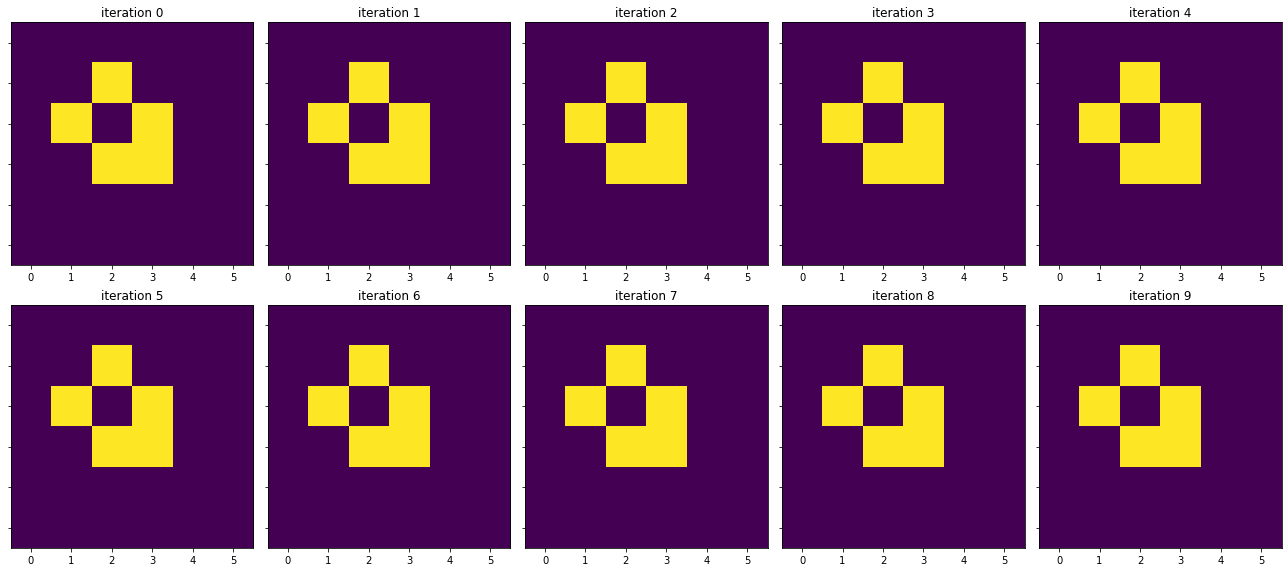

In [37]:
Z=[[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

import matplotlib.pyplot as plt
import time 

liste=list()
for i in range(10):
    liste.append(iteration_jeu(Z))
    plt.subplot(2,5,i+1)
    ax=plt.subplot(2,5,i+1)
    plt.setp(plt.gca(), yticklabels=[])
    plt.title('iteration {}'.format(i))
    plt.imshow(liste[i])
    plt.tight_layout(rect = [0,0, 3, 2])
    

6) Que remarquez-vous entre l'itération 0 et l'itération 4 ? Que se passe-t-il après l'itération 7 ?


Réponse question 6) : 

- Entre l'itértion 0 et l'itération 4 : On remarque d'abord entre l'itération 0 et l'itération 3 que le nombre de cellule vivante reste constante (égale à 5) même si les cellules vivantes changent. Et à l'itération 4 on constate une diminution du nombre de cellules vivantes qui est égale à 4.

- Après l'itération 7 : On peut voir à partir de l'itération 7 que le nombre de cellule vivante reste égale à 4 mais aussi les cellules vivantes restent les mêmes.

## Implémentation avec Numpa

7) 
Reprendre la section précédente avec des fonctions utilisant numba et la compilation "jit". On
proposera en particulier un protocole expérimentale pour comparer les temps de calculs avec ou
sans cet apport.


#### protocole expérimentale pour comparer les temps de calculs.

Le protocole est défini comme suit :
 On calcule d'abord le temps d'éxécution de la fonction itération avant importation de la fonction jit du librairie numba. Puis, on importe la fonction jit et on calcule une deuxième fois le temps d'éxécution de la fonction itération. Ensuite on compare les deux temps obtenus c'est à dire avant et après importation de la fonction jit.

 importation de jit :

In [38]:
## question 9

import numpy as np
import time
from numba import jit

@jit
def iteration_jeu_numba(Z):
    
    forme = len(Z), len(Z[0])
    N = calcul_nb_voisins(Z)
    for x in range(1,forme[0]-1):
        for y in range(1,forme[1]-1):
            if Z[x][y] == 1 and (N[x][y] < 2 or N[x][y] > 3):
                Z[x][y] = 0
            elif Z[x][y] == 0 and N[x][y] == 3:
                Z[x][y] = 1
    return Z

Le temps d'execution avant importation de jit est : 2.756849


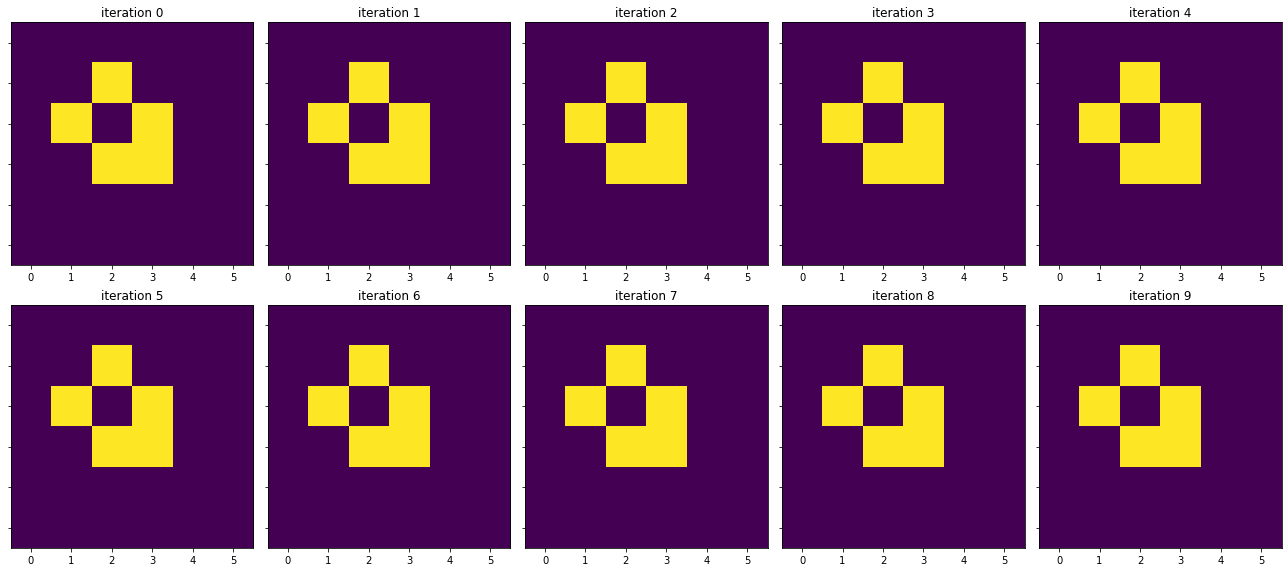

In [39]:
Z=[[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

## avant importation de jit:
tic1=time.time()
liste=list()
for i in range(10):
    liste.append(iteration_jeu(Z))
    plt.subplot(2,5,i+1)
    ax=plt.subplot(2,5,i+1)
    plt.setp(plt.gca(), yticklabels=[])
    plt.title('iteration {}'.format(i))
    plt.imshow(liste[i])
    plt.tight_layout(rect = [0,0, 3, 2])
tac1=  time.time()
print( "Le temps d'execution avant importation de jit est : %f" %(tac1-tic1))



Le temps d'execution aprés importation de jit est : 5.6089818477630615


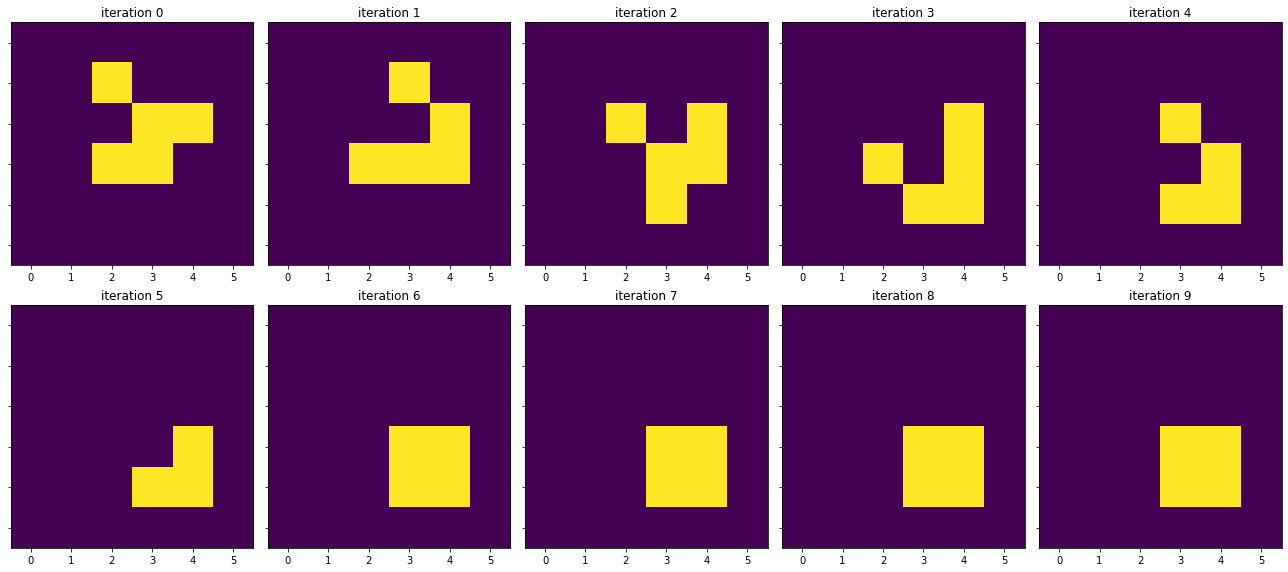

In [40]:
## après importation de jit:

Z=[[0,0,0,0,0,0],
[0,0,0,1,0,0],
[0,1,0,1,0,0],
[0,0,1,1,0,0],
[0,0,0,0,0,0],
[0,0,0,0,0,0]]

tic2=time.time()
liste=list()
for i in range(10):
    liste.append(iteration_jeu_numba(Z))
    plt.subplot(2,5,i+1)
    ax=plt.subplot(2,5,i+1)
    plt.setp(plt.gca(), yticklabels=[])
    plt.title('iteration {}'.format(i))
    plt.imshow(liste[i])
    plt.tight_layout(rect = [0,0, 3, 2])
    tac2=  time.time()
print("Le temps d'execution aprés importation de jit est : %s" % (tac2-tic2))

8) 
Créer un widget dont le curseur permet de contrôler les itérations (par exemple de 0 à 30)
du jeu de la vie quand on initialise avec la matrice Z_huge.

In [45]:
#question 11
#création matrice Z_hudge
Z_huge = np.zeros((20, 20)) #creation
Z_np = np.array(
[[0, 0, 0, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 1, 0, 1, 0, 0],
[0, 0, 1, 1, 0, 0],
[0, 0, 0, 0, 0, 0],
[0, 0, 0, 0, 0, 0]])

Z_huge[10:16, 10:16] = Z_np

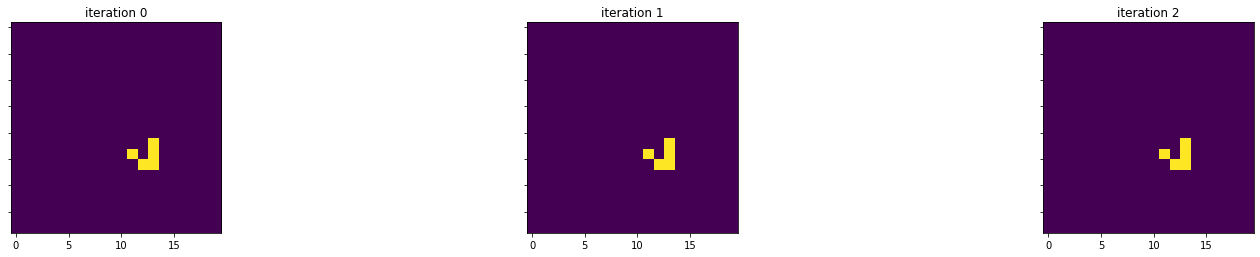

In [46]:
## question 12
def iter(n):
    Z_huge = np.zeros((20, 20)) #creation
    Z_np = np.array(
    [[0, 0, 0, 0, 0, 0],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 0, 1, 0, 0],
    [0, 0, 1, 1, 0, 0],
    [0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0]])

    Z_huge[10:16, 10:16] = Z_np
    
    liste=list()
    for i in range(n):
        liste.append(iteration_jeu(Z_huge))
        plt.subplot(6,5,i+1)
        ax=plt.subplot(6,5,i+1)
        plt.setp(plt.gca(), yticklabels=[])
        plt.title('iteration {}'.format(i))
        plt.imshow(liste[i])
        plt.tight_layout(rect = [0,0, 6, 5])

iter(3)

In [ ]:
## la question 13
##### from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as wg
from IPython.display import display

y=wg.IntSlider(vallu=1, min=0,max=30,step=1)
wg.interact(iter,n=y)

# Exercice 2 :

- 
Visualisation d'un exemple de chaque classe d'image  avec imshow.

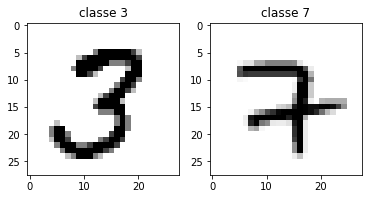

3) 
Utilisation de la fonction LogisticRegression pour apprendre un modèle de classiffcation sur l'intégralité des données.

- 
Implémentation de la fonction de prédiction.

- 
exemple d'exécution de la fonction "predir"

la classe de l'image est 7


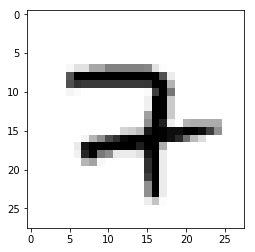

la classe de l'image est 3


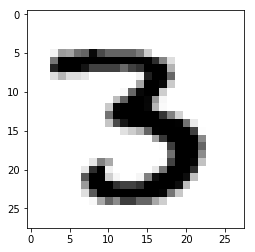

(1, 784)

4)  
implémentation de la fonction fig_digit.

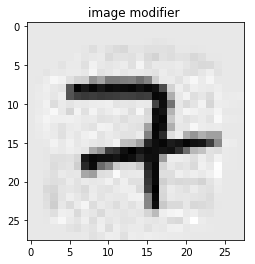

interactive(children=(FloatSlider(value=0.1, description='alpha', min=0.1), Output()), _dom_classes=('widget-i…

<function __main__.fig_digit(alpha)>

6) 
alpha représente le taux d'apprentissage qui contrôle la vitesse de convergence.


7) 
PCA

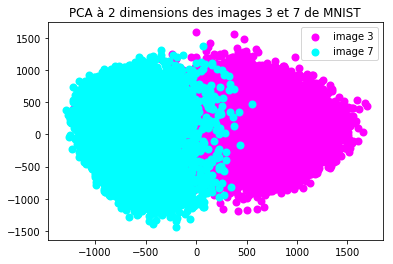

5)
Création d'un film que l'on importera en HTML dans le notebook.

In [24]:
from matplotlib import animation

%matplotlib notebook
fig = plt.figure()
ax = plt.axes(xlim=(0,27),ylim=(27,0))
ims = []

for i in range(100):
    im = fig_digit(i)
    ims.append([im])
#X[0],clf.coef_,
anim = animation.ArtistAnimation(fig, ims, interval=50, blit=True, repeat_delay=1000)
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])
anim.to_html5_video()
plt.show()

<IPython.core.display.Javascript object>

RuntimeError: Requested MovieWriter (ffmpeg) not available